<center><h1>Expected shortfall</h1></center>



In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Expected_shortfall_data.csv')

In [3]:
df

,Obs,Loss data,Loss data (ascending order),Ranking
0,1,8000,-17715,1
1,2,-5429,-14116,2
2,3,1086,-10682,3
3,4,7601,-9275,4
4,5,-14116,-9122,5
...,...,...,...,...
95,96,258,8686,96
96,97,1134,8780,97
97,98,1673,8809,98
98,99,-7440,12088,99


# Statistics
Total number of returns	= 100

Confidence level = 95%

In [4]:
tnc = 100
cfd_ivl = 0.95

### Aplha (Level of significance)

In [6]:
alpha = 1 - cfd_ivl
alpha

0.050000000000000044

In [8]:
alpha = round(alpha,2)
alpha

0.05

### Historic VaR is at position

In [10]:
df.head(10)

,Obs,Loss data,Loss data (ascending order),Ranking
0,1,8000,-17715,1
1,2,-5429,-14116,2
2,3,1086,-10682,3
3,4,7601,-9275,4
4,5,-14116,-9122,5
5,6,2063,-8883,6
6,7,-5056,-8846,7
7,8,-6462,-8808,8
8,9,7869,-8323,9
9,10,-9275,-8188,10


<center>Is at position 5</center>

In [15]:
df.iloc[4,2]

-9122

In [17]:
var_amt = df.iloc[4,2]
var_amt

-9122

# Calculating Tail Loss

In [31]:
def tail_loss(x):
    if x > var_amt:
        return 0 
    else:
        return 1

In [32]:
# Applying our function
df['Loss data (ascending order)'].apply(tail_loss)

0     1
1     1
2     1
3     1
4     1
     ..
95    0
96    0
97    0
98    0
99    0
Name: Loss data (ascending order), Length: 100, dtype: int64

In [33]:
df['Tail Loss'] = df['Loss data (ascending order)'].apply(tail_loss)

In [34]:
df

,Obs,Loss data,Loss data (ascending order),Ranking,Tail Loss
0,1,8000,-17715,1,1
1,2,-5429,-14116,2,1
2,3,1086,-10682,3,1
3,4,7601,-9275,4,1
4,5,-14116,-9122,5,1
...,...,...,...,...,...
95,96,258,8686,96,0
96,97,1134,8780,97,0
97,98,1673,8809,98,0
98,99,-7440,12088,99,0


# Expected Shortfall

Getting the rows with tail loss is 1

In [35]:
df[df['Tail Loss'] == 1]

,Obs,Loss data,Loss data (ascending order),Ranking,Tail Loss
0,1,8000,-17715,1,1
1,2,-5429,-14116,2,1
2,3,1086,-10682,3,1
3,4,7601,-9275,4,1
4,5,-14116,-9122,5,1


In [37]:
df[df['Tail Loss'] == 1]['Loss data (ascending order)'].mean()

-12182.0

<h1><Center>Historical VAR</Center></h1>

Suppose a bank holds a portfolio of various assets, including stocks and bonds. The bank wants to calculate the one-day VaR for this portfolio at a 95% confidence level. This means that the bank wants to estimate the maximum potential loss over the next day with 95% confidence.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv('Historical_VAR.csv',names=['Date', 'Asset 1', 'Asset 1 return (%)'],skiprows=1)

In [10]:
df.columns

Index(['Date', 'Asset 1', 'Asset 1 return (%)'], dtype='object')

In [12]:
df['Rank'] = np.arange(1,253)

In [39]:
df

,Date,Asset 1,Asset 1 return (%),Rank
0,03-01-2019,142.19,-9.9607,1
1,02-11-2018,207.48,-6.6331,2
2,12-11-2018,194.17,-5.0374,3
3,20-11-2018,176.98,-4.7778,4
4,10-10-2018,216.36,-4.6326,5
...,...,...,...,...
247,02-05-2018,176.57,4.4175,248
248,26-03-2018,172.77,4.7472,249
249,01-08-2018,201.50,5.8910,250
250,30-01-2019,165.25,6.8335,251


### Data Preprocessing

In [15]:
df['Asset 1 return (%)'] = df['Asset 1 return (%)'].str.replace('%', '')

In [21]:
df['Asset 1 return (%)'] = pd.to_numeric(df['Asset 1 return (%)'])

In [22]:
df

,Date,Asset 1,Asset 1 return (%),Rank
0,03-01-2019,142.19,-9.9607,1
1,02-11-2018,207.48,-6.6331,2
2,12-11-2018,194.17,-5.0374,3
3,20-11-2018,176.98,-4.7778,4
4,10-10-2018,216.36,-4.6326,5
...,...,...,...,...
247,02-05-2018,176.57,4.4175,248
248,26-03-2018,172.77,4.7472,249
249,01-08-2018,201.50,5.8910,250
250,30-01-2019,165.25,6.8335,251


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                252 non-null    object 
 1   Asset 1             252 non-null    float64
 2   Asset 1 return (%)  252 non-null    float64
 3   Rank                252 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 8.0+ KB


# Statistics
Total number of returns = 252 

Confidence Level = 95%

Alpha (Level of Significance) = 5%

### Historic VaR is at position

In [47]:
historic_var = 252 * 0.05
historic_var

12.600000000000001

### Historic VaR is at position (rounded)

In [51]:
round(historic_var)

13

Text(0, 0.5, 'Labels')

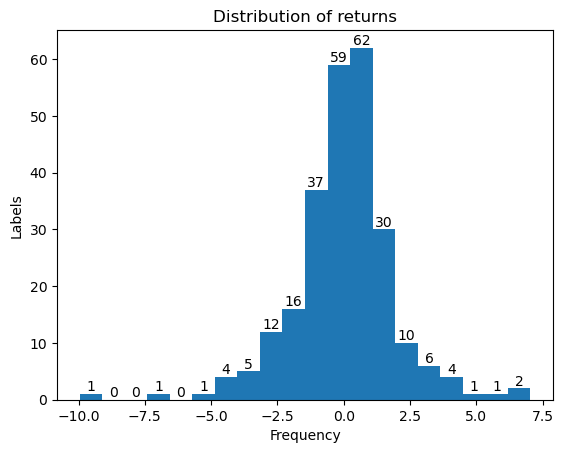

In [61]:
counts, edges, bars = plt.hist(df['Asset 1 return (%)'],bins=20)
plt.bar_label(bars)
plt.title("Distribution of returns")
plt.xlabel("Frequency")
plt.ylabel("Labels")

### Value of my asset (INR)

In [64]:
voa = 1000000
voa

1000000

### VaR amount (INR)

In [76]:
df.iloc[12,2]

-3.1192

In [79]:
(voa * df.iloc[12,2])/100

-31192.0

At a 95% confidence interval, the lower tail displays the lowest 5% of the underlying distribution's returns. For this distribution, the value associated with a 95% confidence interval is a return of -3.1192%. If a bank has invested INR 1,000,000 in this asset , one day VaR is INR 31,191.7 (-3.1192*1000000)

<center><h1>Log-normal VaR</h1></center>

Assuming the logarithmic returns of the portfolio are normally distributed, we can calculate the ```log-normal VaR```.

### Question

Using the same portfolio example, let's assume the mean logarithmic return is 0.04 (4%) and the standard deviation of logarithmic returns is 0.08 (8%). 

We want to calculate the one-day 95% log-normal VaR.

### Solution

To calculate log-normal VaR, 

we use the formula: ```Log-normal VaR``` = ```Portfolio Value``` * (1 - ```e```^(```Mean Log Return``` - (```Z-Score``` * ```Standard Deviation```)))

- Let's assume the portfolio value is INR1,000,000.
- Given a confidence level of 95%, the corresponding Z-score is approximately 1.645.

```Log-normal VaR``` 	

= ```INR 1,000,000``` * ( 1 - ```e``` ^ ( 0.04 - ( 1.645 * 0.08 ))) 

= ```INR 1,000,000``` * ( 1 - ```e```^( -0.0916 )) 


= 87700.00

In [4]:
import math
pft_value = 100000
e = math.exp(1)
mlr =  0.04
z_score = 1.645 
std_dev = 0.08

In [6]:
pft_value * (1 - e**(mlr - (z_score * std_dev)))

8752.993541694954

In [10]:
lg_nrml_var = pft_value * (1 - e**(mlr - (z_score * std_dev)))
lg_nrml_var

8752.993541694954

This means that there is a ```5%``` chance of experiencing a one-day loss of approximately ```INR 87,530``` or more in the portfolio based on the assumption of a log-normal distribution of logarithmic returns.	

<h1><center>Mean Variance Framework</center></h1>

In [1]:
import pandas as pd 

In [5]:
df = pd.read_csv('finance_data2.csv')

In [7]:
df

,Date,Asset 1,Asset 2
0,07-03-2018,175.03,125.72
1,08-03-2018,176.94,125.42
2,09-03-2018,179.98,125.54
3,12-03-2018,181.72,125.54
4,13-03-2018,179.97,125.78
5,14-03-2018,178.44,125.70
6,15-03-2018,178.65,124.90
7,16-03-2018,178.02,124.60
8,19-03-2018,175.30,124.87
9,20-03-2018,175.24,124.31


# Let's calculate the returns 

In [82]:
df['Asset 1']

0     175.03
1     176.94
2     179.98
3     181.72
4     179.97
5     178.44
6     178.65
7     178.02
8     175.30
9     175.24
10    171.27
11    168.85
12    164.94
13    172.77
14    168.34
15    166.48
16    167.78
17    166.68
18    168.39
19    171.61
20    172.80
21    168.38
22    170.05
23    173.25
24    172.44
25    174.14
26    174.73
27    175.82
28    178.24
29    177.84
30    172.80
31    165.72
32    165.24
33    162.94
34    163.65
35    164.22
36    162.32
37    165.26
38    169.10
39    176.57
40    176.89
41    183.83
42    185.16
43    186.05
44    187.36
45    190.04
46    188.59
47    188.15
48    186.44
Name: Asset 1, dtype: float64

In [97]:
df['Asset 1 return %'] = ((df['Asset 1']/df['Asset 1'].shift(1)) -1)* 100

In [98]:
df['Asset 2 return %'] = ((df['Asset 2']/df['Asset 2'].shift(1)) -1)* 100

### Looking at results

In [99]:
df.head()

,Date,Asset 1,Asset 2,Asset 1 return %,Asset 2 return %
0,07-03-2018,175.03,125.72,NaN,NaN
1,08-03-2018,176.94,125.42,1.091242,-0.238626
2,09-03-2018,179.98,125.54,1.718097,0.095679
3,12-03-2018,181.72,125.54,0.966774,0.000000
4,13-03-2018,179.97,125.78,-0.963020,0.191174


# Calculating Statistics

### Mean

In [100]:
df['Asset 1 return %'].mean()

0.14708609498273925

In [101]:
a1_mean = df['Asset 1 return %'].mean()

In [102]:
df['Asset 2 return %'].mean()

-0.0522964300956987

In [103]:
a2_mean = df['Asset 2 return %'].mean()

### Variance

In [104]:
df['Asset 1 return %'].var()

3.1657457985622037

In [105]:
a1_var = df['Asset 1 return %'].var()

In [106]:
df['Asset 2 return %'].var()

0.42562928847880266

In [107]:
a2_var = df['Asset 2 return %'].var()

### Standard Deviation

In [108]:
df['Asset 1 return %'].std()

1.779254281591646

In [109]:
a1_std = df['Asset 1 return %'].std()

In [110]:
df['Asset 2 return %'].std()

0.6524027042240113

In [111]:
a2_std = df['Asset 2 return %'].std()

### Covariance

In [112]:
df.cov()[['Asset 1 return %', 'Asset 2 return %']]

/tmp/ipykernel_1437/4141236379.py:1: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.cov()[['Asset 1 return %', 'Asset 2 return %']]


,Asset 1 return %,Asset 2 return %
Asset 1,3.553268,-0.105203
Asset 2,-0.462175,0.365132
Asset 1 return %,3.165746,-0.031814
Asset 2 return %,-0.031814,0.425629


In [113]:
a_cov = df['Asset 1 return %'].cov(df['Asset 2 return %'])

### Correlation

In [114]:
df.corr()[['Asset 1 return %', 'Asset 2 return %']]

/tmp/ipykernel_1437/2648543438.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()[['Asset 1 return %', 'Asset 2 return %']]


,Asset 1 return %,Asset 2 return %
Asset 1,0.262927,-0.021230
Asset 2,-0.195762,0.421788
Asset 1 return %,1.000000,-0.027407
Asset 2 return %,-0.027407,1.000000


In [115]:
a_corr = df['Asset 1 return %'].corr(df['Asset 2 return %'])

<h1><center>Portfolio</center></h1>

In [116]:
pf = pd.DataFrame({'Asset 1' : [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]})

In [117]:
pf

,Asset 1
0,0.0
1,0.1
2,0.2
3,0.3
4,0.4
5,0.5
6,0.6
7,0.7
8,0.8
9,0.9


In [118]:
pf['Asset 2'] = 1 - pf['Asset 1']

In [119]:
pf

,Asset 1,Asset 2
0,0.0,1.0
1,0.1,0.9
2,0.2,0.8
3,0.3,0.7
4,0.4,0.6
5,0.5,0.5
6,0.6,0.4
7,0.7,0.3
8,0.8,0.2
9,0.9,0.1


### Mean 

In [120]:
pf['Asset 1'] * a1_mean + pf['Asset 2'] * a2_mean

0   -0.052296
1   -0.032358
2   -0.012420
3    0.007518
4    0.027457
5    0.047395
6    0.067333
7    0.087271
8    0.107210
9    0.127148
dtype: float64

In [121]:
pf['Mean'] = pf['Asset 1'] * a1_mean + pf['Asset 2'] * a2_mean

In [122]:
pf

,Asset 1,Asset 2,Mean
0,0.0,1.0,-0.052296
1,0.1,0.9,-0.032358
2,0.2,0.8,-0.012420
3,0.3,0.7,0.007518
4,0.4,0.6,0.027457
5,0.5,0.5,0.047395
6,0.6,0.4,0.067333
7,0.7,0.3,0.087271
8,0.8,0.2,0.107210
9,0.9,0.1,0.127148


### Variance

In [132]:
((pf['Asset 1'] ** 2) * a1_var) + ((pf['Asset 2'] ** 2) * a2_var) + 2 * pf['Asset 1'] * pf['Asset 2'] * a_cov

0    0.425629
1    0.370691
2    0.388852
3    0.480114
4    0.644475
5    0.881937
6    1.192498
7    1.576160
8    2.032922
9    2.562784
dtype: float64

In [133]:
pf['Variance'] = ((pf['Asset 1'] ** 2) * a1_var) + ((pf['Asset 2'] ** 2) * a2_var) + 2 * pf['Asset 1'] * pf['Asset 2'] * a_cov

In [134]:
pf

,Asset 1,Asset 2,Mean,Variance,Standard Deviation
0,0.0,1.0,-0.052296,0.425629,0.212815
1,0.1,0.9,-0.032358,0.370691,0.327804
2,0.2,0.8,-0.012420,0.388852,0.447686
3,0.3,0.7,0.007518,0.480114,0.572460
4,0.4,0.6,0.027457,0.644475,0.702127
5,0.5,0.5,0.047395,0.881937,0.836687
6,0.6,0.4,0.067333,1.192498,0.976139
7,0.7,0.3,0.087271,1.576160,1.120483
8,0.8,0.2,0.107210,2.032922,1.269721
9,0.9,0.1,0.127148,2.562784,1.423850


# Standard Deviation

In [135]:
pf['Variance'] ** 1/2

0    0.212815
1    0.185345
2    0.194426
3    0.240057
4    0.322238
5    0.440968
6    0.596249
7    0.788080
8    1.016461
9    1.281392
Name: Variance, dtype: float64

In [141]:
pf['Standard Deviation'] = pf['Variance'] ** 1/2

In [142]:
pf

,Asset 1,Asset 2,Mean,Variance,Standard Deviation
0,0.0,1.0,-0.052296,0.425629,0.212815
1,0.1,0.9,-0.032358,0.370691,0.185345
2,0.2,0.8,-0.012420,0.388852,0.194426
3,0.3,0.7,0.007518,0.480114,0.240057
4,0.4,0.6,0.027457,0.644475,0.322238
5,0.5,0.5,0.047395,0.881937,0.440968
6,0.6,0.4,0.067333,1.192498,0.596249
7,0.7,0.3,0.087271,1.576160,0.788080
8,0.8,0.2,0.107210,2.032922,1.016461
9,0.9,0.1,0.127148,2.562784,1.281392


# Plotting

Text(0.5, 0, 'Standard Deviation')

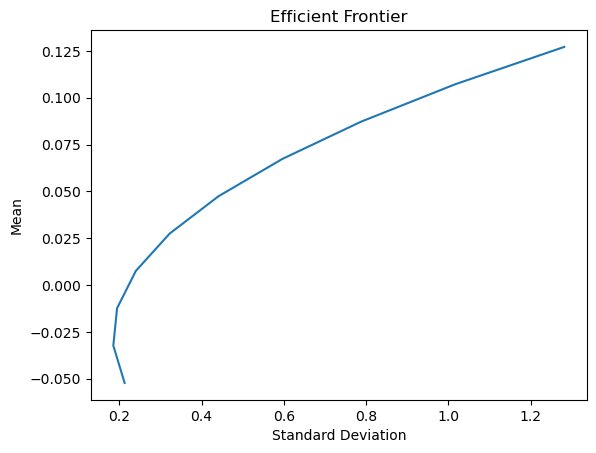

In [149]:
import matplotlib.pyplot as plt
plt.plot(pf['Standard Deviation'],pf['Mean'])
plt.title('Efficient Frontier')
plt.ylabel('Mean')
plt.xlabel('Standard Deviation')

<center><h1>Parametric Gaussian VaR</h1></center>

It assumes portfolio returns follow a specific probability distribution (usually normal distribution) and estimates VaR based on the mean and standard deviation of returns.

```z``` value for a ```VaR``` (5%) = -1.65 

Daily Standard deviation (```σ```) = 0.014 

Portfolio value = 1000000
	

```VaR```	= ```z * σ```

```VaR``` (5%) on ```INR``` basis = ```VaR * Portfolio value``` 

---

#### VaR

In [2]:
z = -1.65
stdev = 0.014

In [3]:
var = z * stdev

In [4]:
var

-0.0231

#### VaR (5%) on INR basis

In [5]:
pftv = 1000000

In [6]:
var * pftv

-23100.0

### Concusion
There is a ```5%``` probabaility that on any given day, the loss in value on this particular asset will equal or exceed ```2.31%``` or ```INR 23,100```

---

# If the expected return is non zero
For a INR 1000000 portfolio, the expected 1-week portfolio return and standard deviation are 0.00188 and .0125 respectively. Calculate the 1 week VaR at 5% level of significance.

```VaR``` = ```[Expected return-zσ] * portfolio value```	

```Expected return``` = 0.00188

```Standard deviation (σ)``` = 0.0125

```z value for a VaR (5%)``` = -1.65

```Portfolio value``` = 1000000

---

In [11]:
expected_return = 0.00188
stddev= 0.0125
z_value = -1.65
Pftv = 1000000

```VaR``` = (```Expected_return``` - (```Standard_deviation ``` * ```z_value```))*```Portfolio_value```

In [12]:
VaR = (expected_return - (stddev * z_value)) * Pftv

In [13]:
VaR

22505.0

```VaR``` = 22505.0

The banker can be 95% confident that the maximum 1-week loss will not exceed INR 22505	

---


<h1><center>Variance-Std Deviation</center></h1>

Consider a dataset of investment returns: (%)

In [1]:
import pandas as pd

In [2]:
df = pd.DataFrame({'Investment Returns': [5,10,-3,8,-2]})
df

,Investment Returns
0,5
1,10
2,-3
3,8
4,-2


# Calculate the mean return

In [4]:
df['Investment Returns'].mean()

3.6

# Calculate the Squared Deviations:
The standard deviation quantifies the average distance between each monthly return and the mean return. A higher standard deviation indicates greater volatility or spread in returns, while a lower standard deviation suggests less volatility. It provides a measure of risk that's easier to interpret since it's expressed in the same units as the original data.

In [10]:
df['Investment Returns'].std()

5.856620185738529

# Calculate the Variance:
The variance quantifies the average squared distance between each monthly return and the mean return. A higher variance indicates greater volatility or spread in returns, while a lower variance suggests less volatility.

In [9]:
df['Investment Returns'].var()

34.3